In [181]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import minmax_scale, normalize

In [182]:
data_set = pd.read_csv('./data/Data_Set.csv', header=2)
data_set.drop('No. Occupants', axis=1, inplace=True)
data_set.head(5)

,Time,E_Plug,E_Heat,Price,Temperature
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,3,16.0,34,11,-19
4,4,16.0,33,12,-18


In [183]:
# Remove repeated row
data_set.drop(2, axis=0, inplace=True)
# data_set = data_set.reset_index(drop=True)
data_set.describe()

,Time,E_Plug,E_Heat,Temperature
count,24.000000,23.000000,24.000000,24.000000
mean,12.500000,31.521739,25.666667,-10.250000
std,7.071068,21.336843,9.262672,7.968689
min,1.000000,16.000000,-4.000000,-22.000000
25%,6.750000,20.500000,19.750000,-16.250000
50%,12.500000,27.000000,28.500000,-13.000000
75%,18.250000,34.500000,32.000000,-3.000000
max,24.000000,120.000000,36.000000,3.000000


In [184]:
min_heat = data_set['E_Heat'].min()
location = data_set['E_Heat'][data_set['E_Heat'] == min_heat]
# data_set.loc[location, 'E_Heat'] = np.abs(min_heat)
data_set['Price'].replace('!', np.NaN, inplace=True)
data_set['E_Heat'].replace(min_heat, 4, inplace=True)
data_set = data_set.apply(pd.to_numeric)
data_set2 = data_set.copy()
data_set.describe()

/tmp/ipykernel_251/2393665143.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Price'].replace('!', np.NaN, inplace=True)
/tmp/ipykernel_251/2393665143.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,Time,E_Plug,E_Heat,Price,Temperature
count,24.000000,23.000000,24.000000,23.000000,24.000000
mean,12.500000,31.521739,26.000000,15.434783,-10.250000
std,7.071068,21.336843,8.235659,3.929216,7.968689
min,1.000000,16.000000,4.000000,10.000000,-22.000000
25%,6.750000,20.500000,19.750000,12.000000,-16.250000
50%,12.500000,27.000000,28.500000,16.000000,-13.000000
75%,18.250000,34.500000,32.000000,18.000000,-3.000000
max,24.000000,120.000000,36.000000,22.000000,3.000000


In [185]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         24 non-null     int64  
 1   E_Plug       23 non-null     float64
 2   E_Heat       24 non-null     int64  
 3   Price        23 non-null     float64
 4   Temperature  24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


In [186]:
data_set

,Time,E_Plug,E_Heat,Price,Temperature
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
3,3,16.0,34,11.0,-19
4,4,16.0,33,12.0,-18
5,5,16.0,30,10.0,-14
6,6,16.0,31,10.0,-16
7,7,19.0,28,14.0,-14
8,8,22.0,29,12.0,-15
9,9,25.0,26,12.0,-12
10,10,26.0,24,14.0,-8


                  Time      E_Plug     E_Heat      Price  Temperature
Time         50.000000   88.535573  -3.826087  25.116601     8.217391
E_Plug       88.535573  455.260870  28.555336  56.354978     0.154150
E_Heat       -3.826087   28.555336  67.826087  -4.685771   -58.782609
Price        25.116601   56.354978  -4.685771  15.438735     8.531621
Temperature   8.217391    0.154150 -58.782609   8.531621    63.500000


<Axes: >

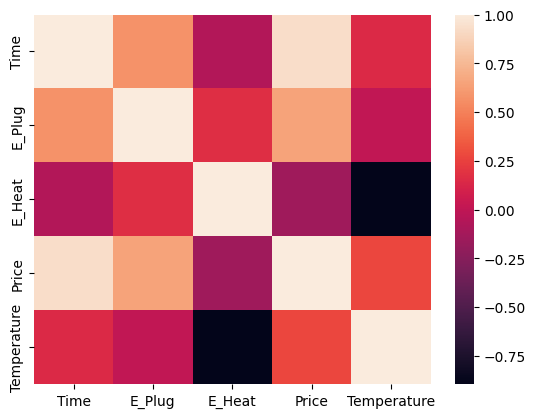

In [187]:
# covariance
print(data_set.cov())
sn.heatmap(data_set.corr())

In [188]:
# data_set.dropna(axis=0, inplace=True)
data_set3 = data_set.fillna(method='ffill')
data_set3

/tmp/ipykernel_251/4005006568.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_set3 = data_set.fillna(method='ffill')


,Time,E_Plug,E_Heat,Price,Temperature
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
3,3,16.0,34,11.0,-19
4,4,16.0,33,12.0,-18
5,5,16.0,30,10.0,-14
6,6,16.0,31,10.0,-16
7,7,19.0,28,14.0,-14
8,8,22.0,29,12.0,-15
9,9,25.0,26,12.0,-12
10,10,26.0,24,14.0,-8


In [189]:
data_set2

,Time,E_Plug,E_Heat,Price,Temperature
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
3,3,16.0,34,11.0,-19
4,4,16.0,33,12.0,-18
5,5,16.0,30,10.0,-14
6,6,16.0,31,10.0,-16
7,7,19.0,28,14.0,-14
8,8,22.0,29,12.0,-15
9,9,25.0,26,12.0,-12
10,10,26.0,24,14.0,-8


In [190]:
# replace missing values 'np.nan' with the mean of the column
m_var = SimpleImputer(missing_values=np.nan, strategy='mean')
m_var.fit(data_set2)
data_set_tr = m_var.transform(data_set2)
data_set4 = pd.DataFrame(data_set_tr, columns=data_set.columns)
data_set4

,Time,E_Plug,E_Heat,Price,Temperature
0,1.0,24.000000,28.0,10.000000,-15.0
1,2.0,17.000000,32.0,12.000000,-17.0
2,3.0,16.000000,34.0,11.000000,-19.0
3,4.0,16.000000,33.0,12.000000,-18.0
4,5.0,16.000000,30.0,10.000000,-14.0
5,6.0,16.000000,31.0,10.000000,-16.0
6,7.0,19.000000,28.0,14.000000,-14.0
7,8.0,22.000000,29.0,12.000000,-15.0
8,9.0,25.000000,26.0,12.000000,-12.0
9,10.0,26.000000,24.0,14.000000,-8.0


<Axes: >

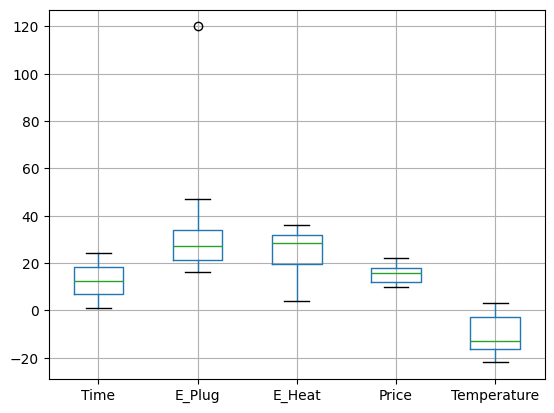

In [191]:
# Outlier detection
# Outliers are observations that fall far away 
# from the majority of the data points. 
# They can be unusually high or low values 
# compared to the rest of the dataset.
data_set4.boxplot()

In [192]:
q_low = data_set4['E_Plug'].quantile(0.01)
q_high = data_set4['E_Plug'].quantile(0.99)

no_outliers = data_set4[(data_set4['E_Plug'] >= q_low) & (data_set4['E_Plug'] < q_high)]
no_outliers

,Time,E_Plug,E_Heat,Price,Temperature
0,1.0,24.000000,28.0,10.000000,-15.0
1,2.0,17.000000,32.0,12.000000,-17.0
2,3.0,16.000000,34.0,11.000000,-19.0
3,4.0,16.000000,33.0,12.000000,-18.0
4,5.0,16.000000,30.0,10.000000,-14.0
5,6.0,16.000000,31.0,10.000000,-16.0
6,7.0,19.000000,28.0,14.000000,-14.0
7,8.0,22.000000,29.0,12.000000,-15.0
8,9.0,25.000000,26.0,12.000000,-12.0
9,10.0,26.000000,24.0,14.000000,-8.0


In [193]:
data_col = pd.read_csv('./data/Data_New.csv', header=0)
dummies = pd.get_dummies(data_col, dtype=int)
data_set5 = pd.concat([data_set4, dummies], axis=1)
data_set5

,Time,E_Plug,E_Heat,Price,Temperature,P/OffP_OffPeak,P/OffP_Peak
0,1.0,24.000000,28.0,10.000000,-15.0,1,0
1,2.0,17.000000,32.0,12.000000,-17.0,1,0
2,3.0,16.000000,34.0,11.000000,-19.0,1,0
3,4.0,16.000000,33.0,12.000000,-18.0,1,0
4,5.0,16.000000,30.0,10.000000,-14.0,1,0
5,6.0,16.000000,31.0,10.000000,-16.0,1,0
6,7.0,19.000000,28.0,14.000000,-14.0,0,1
7,8.0,22.000000,29.0,12.000000,-15.0,0,1
8,9.0,25.000000,26.0,12.000000,-12.0,0,1
9,10.0,26.000000,24.0,14.000000,-8.0,1,0


In [194]:
minmax_scale(data_set5, feature_range=(0, 1))

array([[0.        , 0.07692308, 0.75      , 0.        , 0.28      ,
        1.        , 0.        ],
       [0.04347826, 0.00961538, 0.875     , 0.16666667, 0.2       ,
        1.        , 0.        ],
       [0.08695652, 0.        , 0.9375    , 0.08333333, 0.12      ,
        1.        , 0.        ],
       [0.13043478, 0.        , 0.90625   , 0.16666667, 0.16      ,
        1.        , 0.        ],
       [0.17391304, 0.        , 0.8125    , 0.        , 0.32      ,
        1.        , 0.        ],
       [0.2173913 , 0.        , 0.84375   , 0.        , 0.24      ,
        1.        , 0.        ],
       [0.26086957, 0.02884615, 0.75      , 0.33333333, 0.32      ,
        0.        , 1.        ],
       [0.30434783, 0.05769231, 0.78125   , 0.16666667, 0.28      ,
        0.        , 1.        ],
       [0.34782609, 0.08653846, 0.6875    , 0.16666667, 0.4       ,
        0.        , 1.        ],
       [0.39130435, 0.09615385, 0.625     , 0.33333333, 0.56      ,
        1.        , 0. 

In [195]:
normalize(data_set5, norm='l2', axis=0)

array([[ 0.01428571,  0.13042203,  0.20996326,  0.12848809, -0.23770627,
         0.25      ,  0.        ],
       [ 0.02857143,  0.09238227,  0.23995801,  0.15418571, -0.26940044,
         0.25      ,  0.        ],
       [ 0.04285714,  0.08694802,  0.25495539,  0.1413369 , -0.3010946 ,
         0.25      ,  0.        ],
       [ 0.05714286,  0.08694802,  0.2474567 ,  0.15418571, -0.28524752,
         0.25      ,  0.        ],
       [ 0.07142857,  0.08694802,  0.22496064,  0.12848809, -0.22185918,
         0.25      ,  0.        ],
       [ 0.08571429,  0.08694802,  0.23245932,  0.12848809, -0.25355335,
         0.25      ,  0.        ],
       [ 0.1       ,  0.10325078,  0.20996326,  0.17988333, -0.22185918,
         0.        ,  0.35355339],
       [ 0.11428571,  0.11955353,  0.21746195,  0.15418571, -0.23770627,
         0.        ,  0.35355339],
       [ 0.12857143,  0.13585628,  0.19496588,  0.15418571, -0.19016501,
         0.        ,  0.35355339],
       [ 0.14285714,  0.1412